In [48]:
#Insatlling nessary libraries
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

In [49]:
#Fetching Data from csv file
data=pd.read_csv('./Data/RELIANCE.NS.csv')


In [50]:
#Data Cleaning

#Dropping unnecessary columns
data.drop([0,1],inplace=True)

#Correctly naming columns
data.rename(columns={'Price':'Date'},inplace=True)

#Converting to datetime format
data['Date']=pd.to_datetime(data['Date'])
data.set_index('Date',inplace=True)




In [51]:
#Exploratory Data Analysis
data.info()
data.describe()
data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7385 entries, 1996-01-01 to 2025-06-03
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   7385 non-null   object
 1   High    7385 non-null   object
 2   Low     7385 non-null   object
 3   Open    7385 non-null   object
 4   Volume  7385 non-null   object
dtypes: object(5)
memory usage: 346.2+ KB


,Close,High,Low,Open,Volume
Date,,,,,
1996-01-01,6.038956165313721,6.049228936932856,5.97731953559891,6.016943363273252,104121369
1996-01-02,5.991995811462402,6.053633238919969,5.947969805565693,6.024282568322163,168743308
1996-01-03,6.037489891052246,6.367687855516295,6.0242822076741716,6.0903210165653565,209323879
1996-01-04,5.981723308563232,5.9993339469202915,5.901008372761111,5.980256049367451,216900264
1996-01-05,5.940631866455078,5.958242503790565,5.889267997560949,5.958242503790565,166708467


In [52]:
#Converting Object to Float
data['Close']=data['Close'].astype('Float64')
data['High']=data['High'].astype('Float64')
data['Low']=data['Low'].astype('Float64')
data['Open']=data['Open'].astype('Float64')
data['Volume']=data['Volume'].astype('Float64')

GOLDEN CROSSOVER

**Golden Crossover Trading Strategy**

- **Buy Signal:** When the 20-period Simple Moving Average (SMA) crosses above the 50-period SMA.
- **Sell Signal:** When the 50-period SMA crosses above the 20-period SMA.

> The Golden Crossover is a popular technical analysis strategy used to identify potential trend reversals and trading opportunities.  
> - A bullish crossover (Buy) suggests upward momentum.  
> - A bearish crossover (Sell) indicates possible downward movement.

In [53]:
#Calculating 20 SMA and 50 SMA
data['20_SMA']=data.Close.rolling(window=20).mean()
data['50_SMA']=data.Close.rolling(window=50).mean()

In [54]:
data.iloc[-300:]['20_SMA']

Date
2024-03-14    1474.800000
2024-03-15    1472.181250
2024-03-18    1471.126251
2024-03-19    1468.688751
2024-03-20    1467.325000
                 ...     
2025-05-28    1422.750006
2025-05-29    1423.390009
2025-05-30    1423.445007
2025-06-02    1422.565002
2025-06-03    1421.795001
Name: 20_SMA, Length: 300, dtype: float64

In [55]:
#Generating Buy and Sell Signals
data['Signal']=0
data['Signal']=np.where(data['20_SMA']>data['50_SMA'],1,0)

In [56]:
data.iloc[-300:]['Signal']

Date
2024-03-14    1
2024-03-15    1
2024-03-18    1
2024-03-19    1
2024-03-20    1
             ..
2025-05-28    1
2025-05-29    1
2025-05-30    1
2025-06-02    1
2025-06-03    1
Name: Signal, Length: 300, dtype: int32

In [57]:
#position where golden crossovers happen
data['Position']=data.Signal.diff()

In [58]:
data['Position'].describe()

count    7384.000000
mean        0.000135
std         0.159998
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Position, dtype: float64

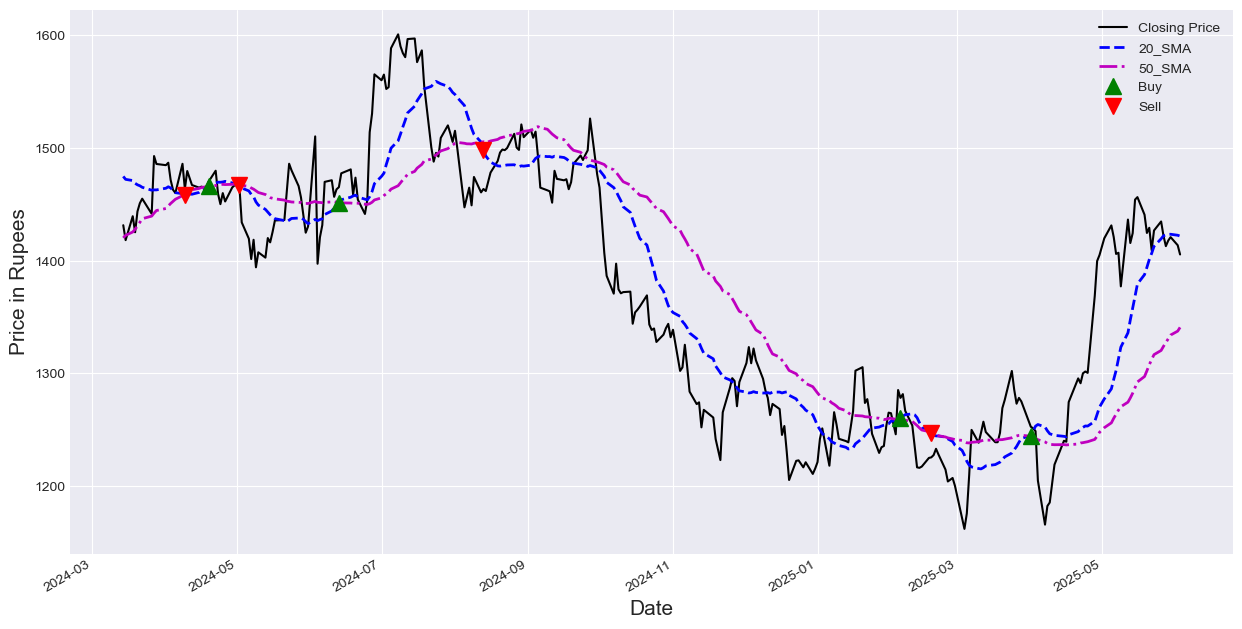

In [59]:
#Visualisations
recent=data.iloc[-300:]
plt.figure(figsize=(15,8))
plt.plot(recent.index,recent['Close'],label='Closing Price',color='k')
plt.plot(recent.index,recent['20_SMA'],label='20_SMA',color='b', linestyle='--', linewidth=2)
plt.plot(recent.index,recent['50_SMA'],label='50_SMA',color='m',linestyle='-.', linewidth=2)

#Buy Signals
plt.plot(recent[recent['Position']==1].index,recent['20_SMA'][recent['Position']==1],'^',markersize=12,color='g',label='Buy')

#Sell Signals
plt.plot(recent[recent['Position']==-1].index,recent['20_SMA'][recent['Position']==-1],'v',markersize=12,color='r',label='Sell')



plt.xlabel('Date', fontsize = 15 )
plt.ylabel('Price in Rupees', fontsize = 15 )

plt.legend()
plt.gcf().autofmt_xdate()
plt.grid(True)
plt.show()

In [60]:
#Tabulation Data of points of intersection
df_points=recent[(recent['Position']==1) | (recent['Position']==-1)].copy()
# df_points['Signal']='Buy' if df_points['Position']==1 else 'Sell'
f=lambda x:'Buy' if x==1 else 'Sell'
df_points['Signal']=df_points['Position'].apply(f)

print(tabulate(df_points[['Close','Signal']],headers='keys',tablefmt='psql'))


+---------------------+---------+----------+
| Date                |   Close | Signal   |
|---------------------+---------+----------|
| 2024-04-09 00:00:00 | 1463.65 | Sell     |
| 2024-04-19 00:00:00 | 1470.12 | Buy      |
| 2024-05-02 00:00:00 | 1466.55 | Sell     |
| 2024-06-13 00:00:00 | 1465.25 | Buy      |
| 2024-08-13 00:00:00 | 1463.62 | Sell     |
| 2025-02-05 00:00:00 | 1278.2  | Buy      |
| 2025-02-18 00:00:00 | 1225.4  | Sell     |
| 2025-04-01 00:00:00 | 1252.6  | Buy      |
+---------------------+---------+----------+


In [61]:
def goldencrossoversignalgenerator(ticker):
    # Fetching Data from csv file
    data = pd.read_csv(f'./Data/{ticker}.NS.csv')

    # Data Cleaning
    data.drop([0, 1], inplace=True)
    data.rename(columns={'Price': 'Date'}, inplace=True)
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)

    # Converting Object to Float
    data['Close'] = data['Close'].astype('Float64')
    data['High'] = data['High'].astype('Float64')
    data['Low'] = data['Low'].astype('Float64')
    data['Open'] = data['Open'].astype('Float64')
    data['Volume'] = data['Volume'].astype('Float64')

    # Calculating 20 SMA and 50 SMA
    data['20_SMA'] = data.Close.rolling(window=20).mean()
    data['50_SMA'] = data.Close.rolling(window=50).mean()

    # Generating Buy and Sell Signals
    data['Signal'] = 0
    data['Signal'] = np.where(data['20_SMA'] > data['50_SMA'], 1, 0)

    # Position where golden crossovers happen
    data['Position'] = data.Signal.diff()

    # Visualisations
    recent = data.iloc[-300:]
    plt.style.use('seaborn-v0_8-darkgrid')
    plt.figure(figsize=(16, 9))
    plt.plot(recent.index, recent['Close'], label='Closing Price', color='k', linewidth=2)
    plt.plot(recent.index, recent['20_SMA'], label='20 SMA', color='b', linestyle='--', linewidth=2)
    plt.plot(recent.index, recent['50_SMA'], label='50 SMA', color='m', linestyle='-.', linewidth=2)

    # Buy Signals
    plt.plot(
        recent[recent['Position'] == 1].index,
        recent['20_SMA'][recent['Position'] == 1],
        '^', markersize=14, color='#38b000', label='Buy', alpha=0.9
    )

    # Sell Signals
    plt.plot(
        recent[recent['Position'] == -1].index,
        recent['20_SMA'][recent['Position'] == -1],
        'v', markersize=14, color='#d90429', label='Sell', alpha=0.9
    )

    plt.title(f'Golden Crossover Strategy Signals for {ticker}', fontsize=22, fontweight='bold')
    plt.xlabel('Date', fontsize=16)
    plt.ylabel('Price in Rupees', fontsize=16)
    plt.legend(fontsize=14)
    plt.grid(True)
    plt.gcf().autofmt_xdate()
    plt.show()

    # Tabulation Data of points of intersection
    df_points = recent[(recent['Position'] == 1) | (recent['Position'] == -1)].copy()
    f = lambda x: 'Buy' if x == 1 else 'Sell'
    df_points['Signal'] = df_points['Position'].apply(f)

    print(tabulate(df_points[['Close', 'Signal']], headers='keys', tablefmt='psql'))

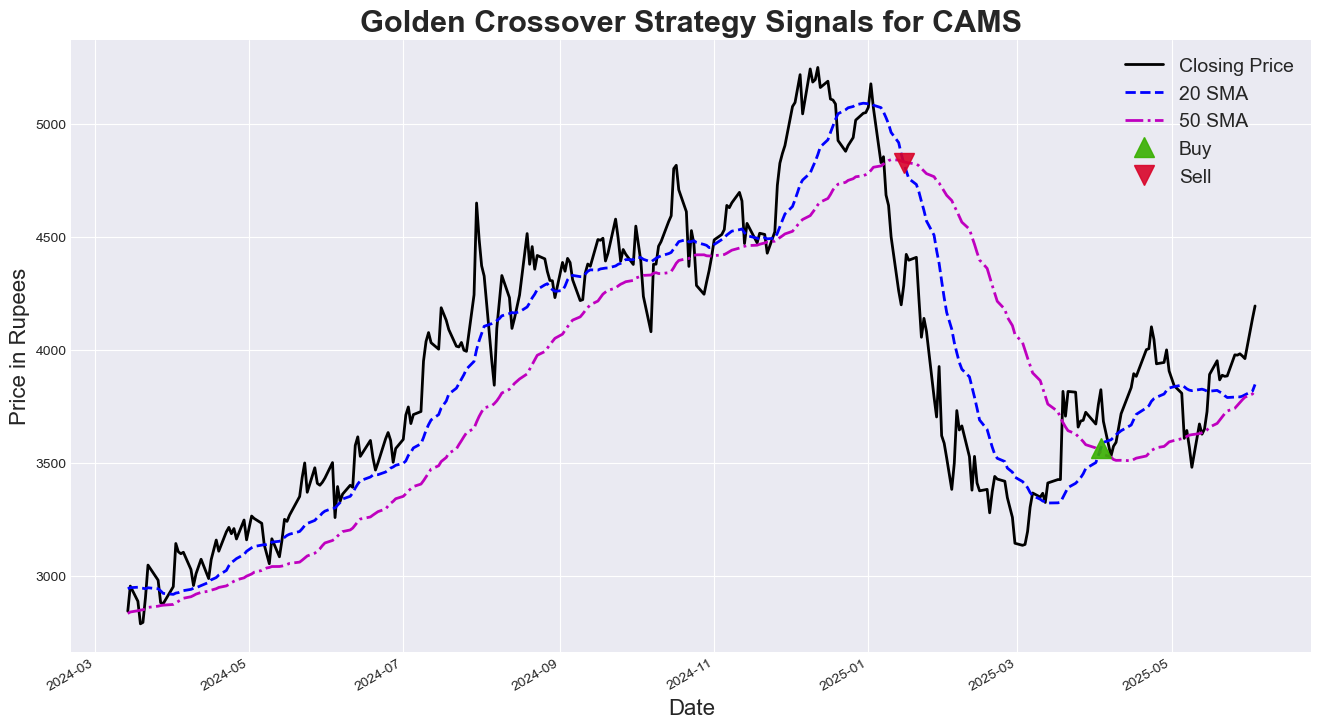

+---------------------+---------+----------+
| Date                |   Close | Signal   |
|---------------------+---------+----------|
| 2025-01-15 00:00:00 | 4284.83 | Sell     |
| 2025-04-03 00:00:00 | 3823.3  | Buy      |
+---------------------+---------+----------+


In [62]:
goldencrossoversignalgenerator('CAMS')

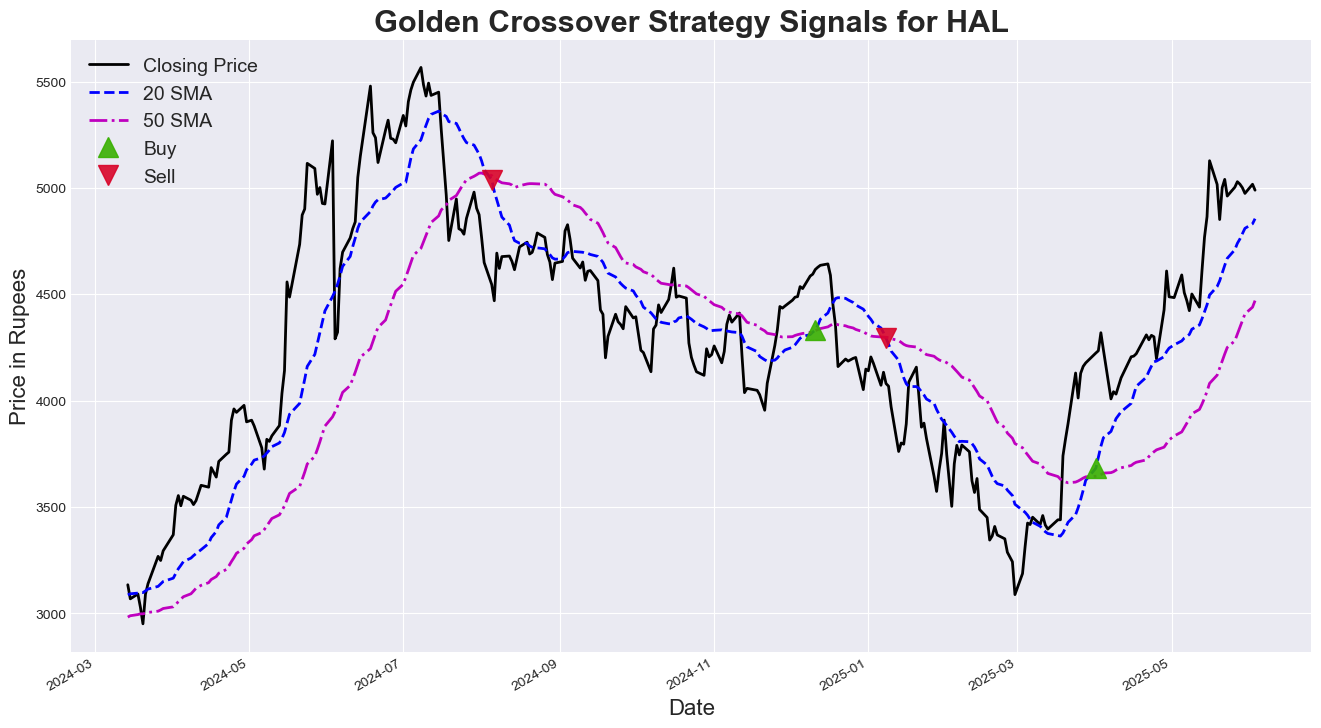

+---------------------+---------+----------+
| Date                |   Close | Signal   |
|---------------------+---------+----------|
| 2024-08-05 00:00:00 | 4545.57 | Sell     |
| 2024-12-11 00:00:00 | 4616.26 | Buy      |
| 2025-01-08 00:00:00 | 4080.24 | Sell     |
| 2025-04-01 00:00:00 | 4223.7  | Buy      |
+---------------------+---------+----------+


In [63]:
goldencrossoversignalgenerator('HAL')

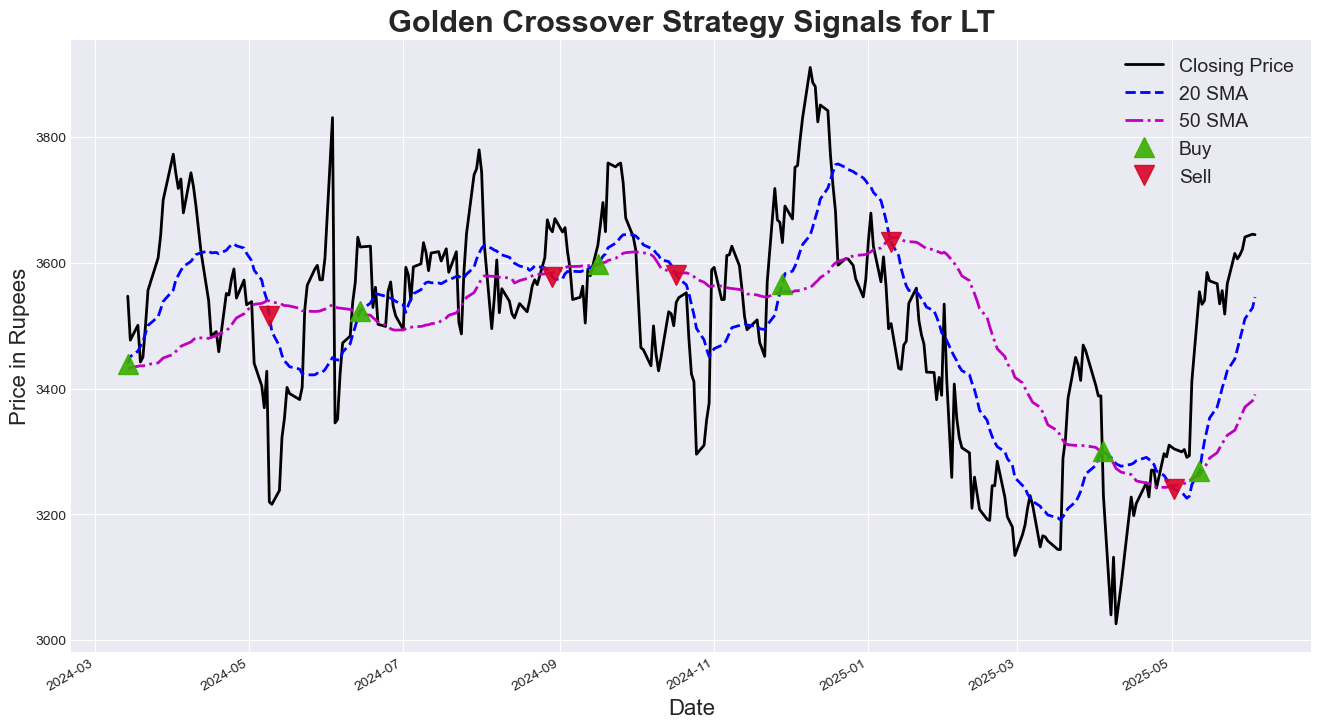

+---------------------+---------+----------+
| Date                |   Close | Signal   |
|---------------------+---------+----------|
| 2024-03-14 00:00:00 | 3546.98 | Buy      |
| 2024-05-09 00:00:00 | 3219.87 | Sell     |
| 2024-06-14 00:00:00 | 3625.23 | Buy      |
| 2024-08-29 00:00:00 | 3649.41 | Sell     |
| 2024-09-16 00:00:00 | 3628.41 | Buy      |
| 2024-10-17 00:00:00 | 3537.31 | Sell     |
| 2024-11-28 00:00:00 | 3632.18 | Buy      |
| 2025-01-10 00:00:00 | 3503.48 | Sell     |
| 2025-04-04 00:00:00 | 3230.03 | Buy      |
| 2025-05-02 00:00:00 | 3304.08 | Sell     |
| 2025-05-12 00:00:00 | 3554.05 | Buy      |
+---------------------+---------+----------+


In [64]:
goldencrossoversignalgenerator('LT')


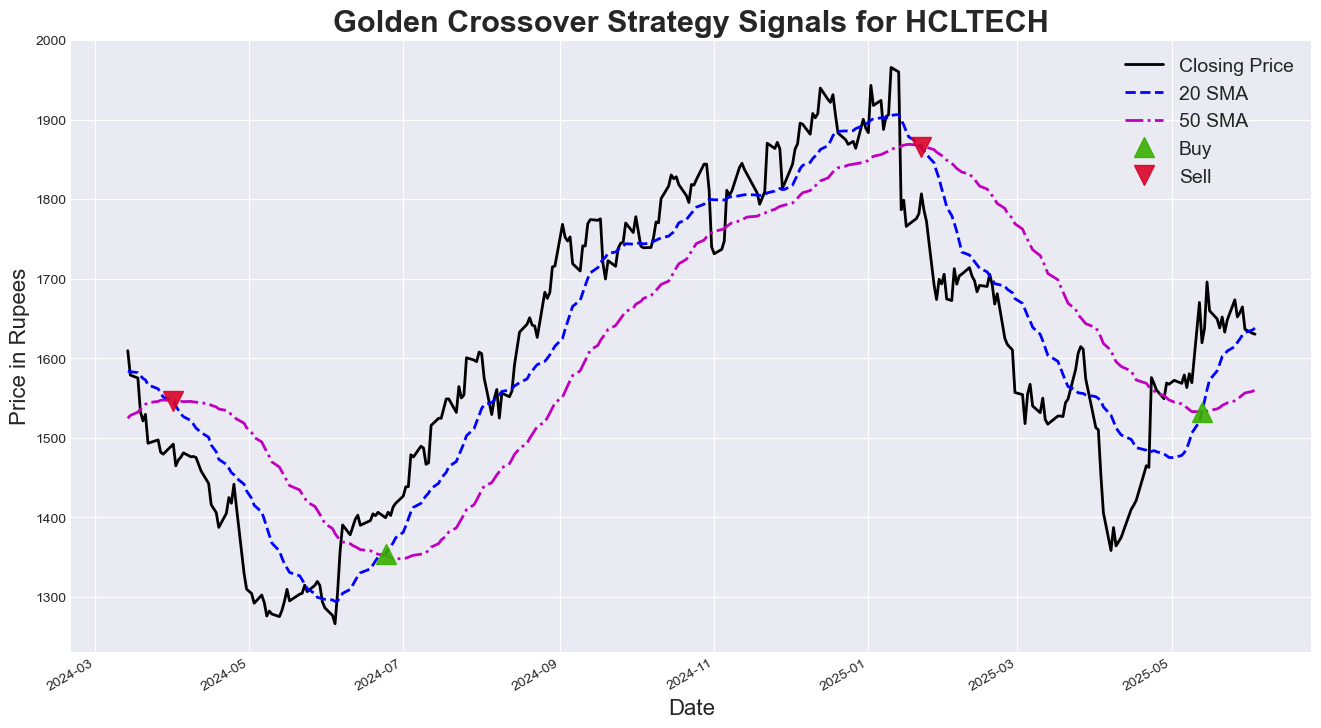

+---------------------+---------+----------+
| Date                |   Close | Signal   |
|---------------------+---------+----------|
| 2024-04-01 00:00:00 | 1492.18 | Sell     |
| 2024-06-24 00:00:00 | 1399.68 | Buy      |
| 2025-01-22 00:00:00 | 1806.85 | Sell     |
| 2025-05-13 00:00:00 | 1619.6  | Buy      |
+---------------------+---------+----------+


In [65]:
goldencrossoversignalgenerator('HCLTECH')
